In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import plotly.plotly as plot

In [2]:
#df=pd.concat([df,df1,df2])
#df.to_csv("tweets.csv")
#df.columns

In [3]:
df=pd.read_csv("tweets.csv")
df.columns

Index(['Unnamed: 0', 'status_id', 'user_id', 'created_at', 'screen_name',
       'text', 'source', 'reply_to_status_id', 'reply_to_user_id',
       'reply_to_screen_name', 'is_quote', 'is_retweet', 'favourites_count',
       'retweet_count', 'country_code', 'place_full_name', 'place_type',
       'followers_count', 'friends_count', 'account_lang',
       'account_created_at', 'verified', 'lang'],
      dtype='object')

In [4]:
df.corr()

Unnamed: 0  status_id   user_id  reply_to_status_id  \
Unnamed: 0            1.000000  -0.081882  0.007689           -0.040601   
status_id            -0.081882   1.000000  0.039550            0.120461   
user_id               0.007689   0.039550  1.000000            0.046987   
reply_to_status_id   -0.040601   0.120461  0.046987            1.000000   
reply_to_user_id     -0.040744   0.122574  0.345264            0.040262   
is_quote              0.016687  -0.009878 -0.074567            0.003268   
is_retweet                 NaN        NaN       NaN                 NaN   
favourites_count     -0.066253  -0.000739 -0.039669            0.016884   
retweet_count        -0.000242  -0.009229 -0.051577            0.006098   
followers_count       0.008564   0.003985 -0.045951           -0.001875   
friends_count        -0.020576  -0.019666 -0.051508            0.023473   
account_lang               NaN        NaN       NaN                 NaN   
verified             -0.015222  -0.017581 -0.128092            0.006345   

                    reply_to_user_id  is_quote  is_retweet  favourites_count  \
Unnamed: 0                 -0.040744  0.016687         NaN         -0.066253   
status_id                   0.122574 -0.009878         NaN         -0.000739   
user_id                     0.345264 -0.074567         NaN         -0.039669   
reply_to_status_id          0.040262  0.003268         NaN          0.016884   
reply_to_user_id            1.000000 -0.032358         NaN          0.088432   
is_quote                   -0.032358  1.000000         NaN          0.047065   
is_retweet                       NaN       NaN         NaN               NaN   
favourites_count            0.088432  0.047065         NaN          1.000000   
retweet_count               0.015593 -0.012954         NaN          0.074761   
followers_count            -0.041678 -0.004632         NaN          0.008871   
friends_count               0.050443  0.003672         NaN          0.101485   
account_lang                     NaN       NaN         NaN               NaN   
verified                   -0.043615  0.012979         NaN          0.015422   

                    retweet_count  followers_count  friends_count  \
Unnamed: 0              -0.000242         0.008564      -0.020576   
status_id               -0.009229         0.003985      -0.019666   
user_id                 -0.051577        -0.045951      -0.051508   
reply_to_status_id       0.006098        -0.001875       0.023473   
reply_to_user_id         0.015593        -0.041678       0.050443   
is_quote                -0.012954        -0.004632       0.003672   
is_retweet                    NaN              NaN            NaN   
favourites_count         0.074761         0.008871       0.101485   
retweet_count            1.000000         0.339052       0.011661   
followers_count          0.339052         1.000000       0.028572   
friends_count            0.011661         0.028572       1.000000   
account_lang                  NaN              NaN            NaN   
verified                 0.219963         0.218774       0.013792   

                    account_lang  verified  
Unnamed: 0                   NaN -0.015222  
status_id                    NaN -0.017581  
user_id                      NaN -0.128092  
reply_to_status_id           NaN  0.006345  
reply_to_user_id             NaN -0.043615  
is_quote                     NaN  0.012979  
is_retweet                   NaN       NaN  
favourites_count             NaN  0.015422  
retweet_count                NaN  0.219963  
followers_count              NaN  0.218774  
friends_count                NaN  0.013792  
account_lang                 NaN       NaN  
verified                     NaN  1.000000

In [5]:
df.reset_index(drop=True)
df=df["text"]
df.head()

0    ‡§Ö‡§∞‡•á ‡§ï‡•ã‡§à ‡§á‡§® ‡§ú‡§æ‡§π‡§ø‡§≤ ‡§ó‡§µ‡§æ‡§∞‡•ã‡§Ç ‡§ï‡•ã ‡§∏‡§Æ‡§ù‡§æ‡§è ‡§Ö‡§ó‡§∞ ‡§Ø‡•á (‡§à‡§∂‡•ç‡§µ‡§∞...
1    #‡§ú‡§¨‡§≤‡§™‡•Å‡§∞ 9 ‡§∏‡§æ‡§≤ ‡§ï‡§æ ‡§Æ‡§æ‡§∏‡•Ç‡§Æ ‡§ï‡•ã‡§∞‡•ã‡§®‡§æ ‡§™‡•â‡§ú‡§ø‡§ü‡§ø‡§µ ‡§π‡•à‡•§ ‡§Ö‡§ï‡•á‡§≤...
2    Interesting Read. A Four point strategy beyond...
3    #iamvipinsahu @iamvipinsahu #vipin_sahu #vipin...
4    (#COVID19) #‡§ï‡•ã‡§∞‡•ã‡§®‡§æ ‡§µ‡•à‡§∂‡•ç‡§µ‡§ø‡§ï ‡§Æ‡§π‡§æ‡§Æ‡§æ‡§∞‡•Ä ‡§∏‡•á ‡§∏‡§Ç‡§¨‡§Ç‡§ß‡§ø‡§§ ...
Name: text, dtype: object

In [6]:
df.reset_index(drop=True,inplace=True)
df=pd.DataFrame(df)

In [7]:
df.head(11)

text
0   ‡§Ö‡§∞‡•á ‡§ï‡•ã‡§à ‡§á‡§® ‡§ú‡§æ‡§π‡§ø‡§≤ ‡§ó‡§µ‡§æ‡§∞‡•ã‡§Ç ‡§ï‡•ã ‡§∏‡§Æ‡§ù‡§æ‡§è ‡§Ö‡§ó‡§∞ ‡§Ø‡•á (‡§à‡§∂‡•ç‡§µ‡§∞...
1   #‡§ú‡§¨‡§≤‡§™‡•Å‡§∞ 9 ‡§∏‡§æ‡§≤ ‡§ï‡§æ ‡§Æ‡§æ‡§∏‡•Ç‡§Æ ‡§ï‡•ã‡§∞‡•ã‡§®‡§æ ‡§™‡•â‡§ú‡§ø‡§ü‡§ø‡§µ ‡§π‡•à‡•§ ‡§Ö‡§ï‡•á‡§≤...
2   Interesting Read. A Four point strategy beyond...
3   #iamvipinsahu @iamvipinsahu #vipin_sahu #vipin...
4   (#COVID19) #‡§ï‡•ã‡§∞‡•ã‡§®‡§æ ‡§µ‡•à‡§∂‡•ç‡§µ‡§ø‡§ï ‡§Æ‡§π‡§æ‡§Æ‡§æ‡§∞‡•Ä ‡§∏‡•á ‡§∏‡§Ç‡§¨‡§Ç‡§ß‡§ø‡§§ ...
5   @Imamofpeace China sneezed - world freezed.\n\...
6   The poor in India are starving, the public is ...
7   We are not stuck at home we are safe at home.....
8   ‡§á‡§ü‡§≤‡•Ä ‡§Æ‡•á‡§Ç ‡§Ö‡§¨‡§§‡§ï 1000 ‡§´‡§æ‡§¶‡§∞ ‡§Æ‡§∞ ‡§ö‡•Å‡§ï‡•á ‡§π‡•à‡§Ç ‡§î‡§∞ ‡§Ø‡•á ‡§≤‡•ã‡§ó ...
9   ‡§ó‡•å‡§∞ ‡§ï‡§∞‡•ã‡§ó‡•á ‡§§‡•ã ‡§´‡§∞‡•ç‡§ï ‡§¶‡§ø‡§ñ‡•á‡§ó‡§æ...\n‡§™‡§§‡•ç‡§•‡§∞ ‡§π‡•ã‡§§‡•á ‡§π‡•ã‡§Ç‡§ó‡•á ...
10  I wish to contribute a little amount to our lo...

In [8]:
pip install TextBlob

     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 636 kB 3.2 MB/s eta 0:00:01
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1.4 MB 11.1 MB/s eta 0:00:01
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 661 kB 17.8 MB/s eta 0:00:01
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 63 kB 2.6 MB/s  eta 0:00:01
  Created wheel for nltk: filename=nltk-3.5-py3-none-any.whl size=1434678 sha256=62e2a53a1a527ef86fee56d817f8d3ef917ae8a08f4b0a3014fd67b78066ac8c
  Stored in directory: /home/jovyan/.cache/pip/wheels/45/6c/46/a1865e7ba706b3817f5d1b2ff7ce8996aabdd0d03d47ba0266
Successfully built nltk
Note: you may need to restart the kernel to use updated packages.


In [9]:
from textblob import TextBlob

In [10]:
l=[]
def analyzer(input_text):
    
    score = TextBlob(input_text).sentiment.polarity
   
    return score


In [11]:
import re
def clean(text):
        pattern = re.sub("https://t.co/", "", text)
        return pattern

In [12]:
df['textblob_sent'] = df["text"].apply(analyzer)
df["text"]=df["text"].apply(clean)
df.head(1)

text  textblob_sent
0  ‡§Ö‡§∞‡•á ‡§ï‡•ã‡§à ‡§á‡§® ‡§ú‡§æ‡§π‡§ø‡§≤ ‡§ó‡§µ‡§æ‡§∞‡•ã‡§Ç ‡§ï‡•ã ‡§∏‡§Æ‡§ù‡§æ‡§è ‡§Ö‡§ó‡§∞ ‡§Ø‡•á (‡§à‡§∂‡•ç‡§µ‡§∞...            0.0

In [13]:
neu=0
pos=0
neg=0
for i in df["textblob_sent"]:
    if i<0:
        neu+=1
    if i==0:
        pos+=1
    else:
        neg+=1

In [15]:
x=["positive","negitive","nuteral"]
tot=pos+neg+neu
pos_per=(pos/tot)*100
neg_per=(neg/tot)*100
neu_per=(neu/tot)*100
print(pos_per,neg_per,neu_per)

53.609239653512994 37.15110683349375 9.239653512993263


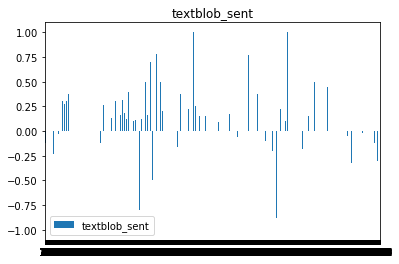

In [16]:
axes = df.plot.bar(rot=0, subplots=True)

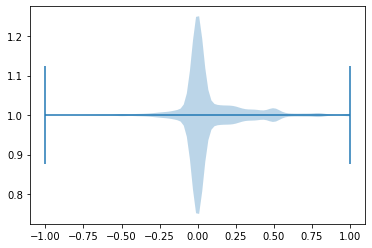

In [17]:
fig, ax = plt.subplots()
ax.violinplot(df["textblob_sent"], vert=False)
plt.show()

In [18]:
pos,neg,neu

(4456, 3088, 768)

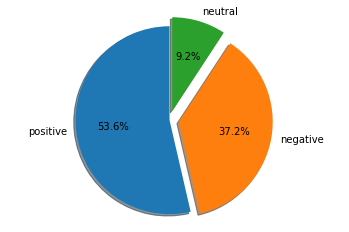

In [22]:
labels="positive","negative","neutral"
sizes=[pos_per,neg_per,neu_per]
explode = (0, 0.1, 0.1)
fig,ax=plt.subplots()
ax.pie(sizes,explode=explode,labels=labels,autopct='%1.1f%%',shadow=True,startangle=90)
ax.axis("equal")
plt.show()       

Text(0.5, 1.0, 'Sentiment bar chart')

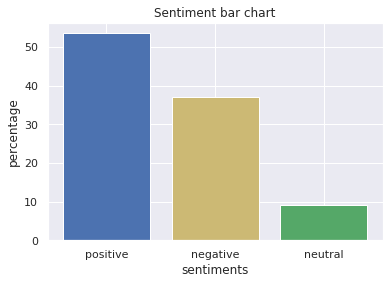

In [46]:
plt.bar(labels,sizes,align="center",alpha=1,color=["b","y","g"])
plt.ylabel('percentage')
plt.xlabel("sentiments")
plt.title('Sentiment bar chart')

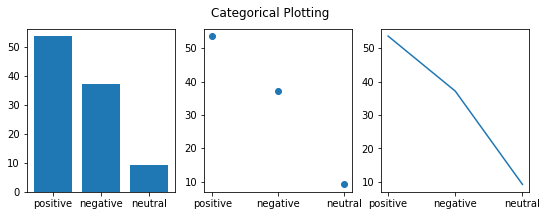

In [24]:

plt.figure(figsize=(9, 3))

plt.subplot(131)
plt.bar(labels, sizes)
plt.subplot(132)
plt.scatter(labels, sizes)
plt.subplot(133)
plt.plot(labels, sizes)
plt.suptitle('Categorical Plotting')
plt.show()


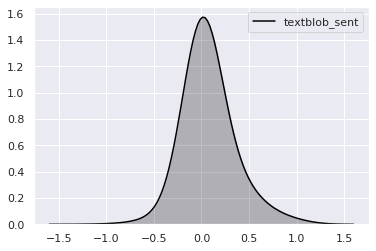

In [43]:
import seaborn as sns
for col in 'x':
    sns.kdeplot(df["textblob_sent"], shade=True,color="black",bw=.20)

In [48]:
text = " ".join(review for review in df["text"])
text

'‡§Ö‡§∞‡•á ‡§ï‡•ã‡§à ‡§á‡§® ‡§ú‡§æ‡§π‡§ø‡§≤ ‡§ó‡§µ‡§æ‡§∞‡•ã‡§Ç ‡§ï‡•ã ‡§∏‡§Æ‡§ù‡§æ‡§è ‡§Ö‡§ó‡§∞ ‡§Ø‡•á (‡§à‡§∂‡•ç‡§µ‡§∞ ‡§ï‡•á ‡§¶‡•Ç‡§§/‡§ñ‡•Å‡§¶‡§æ ‡§ï‡•á ‡§¨‡§®‡•ç‡§¶‡•á) ‡§®‡§æ‡§∞‡§æ‡§ú ‡§π‡•ã ‡§ó‡§è ‡§§‡•ã ‡§Ø‡§æ‡§¶ ‡§∞‡§ñ‡§®‡§æ ‡§´‡§ø‡§∞ ‡§∏‡§°‡§º‡§§‡•á ‡§∞‡§π‡§®‡§æ ‡§ò‡§∞ ‡§ï‡•á ‡§Ö‡§Ç‡§¶‡§∞, ‡§ï‡•ã‡§à ‡§ñ‡•Å‡§¶‡§æ ‡§®‡§π‡•Ä‡§Ç ‡§Ü‡§è‡§ó‡§æ ‡§§‡•Å‡§Æ‡•ç‡§π‡•á‡§Ç ‡§¨‡§ö‡§æ‡§®‡•á\n#Muradabad \n#COVID19 \n#IndiaFightsCorona fBBy4VD2wd #‡§ú‡§¨‡§≤‡§™‡•Å‡§∞ 9 ‡§∏‡§æ‡§≤ ‡§ï‡§æ ‡§Æ‡§æ‡§∏‡•Ç‡§Æ ‡§ï‡•ã‡§∞‡•ã‡§®‡§æ ‡§™‡•â‡§ú‡§ø‡§ü‡§ø‡§µ ‡§π‡•à‡•§ ‡§Ö‡§ï‡•á‡§≤‡•á ‡§π‡•â‡§∏‡•ç‡§™‡§ø‡§ü‡§≤ ‡§ú‡§æ ‡§∞‡§π‡•á ‡§¨‡§ö‡•ç‡§ö‡•á ‡§™‡§∞ ‡§ï‡•ç‡§Ø‡§æ ‡§¨‡•Ä‡§§ ‡§∞‡§π‡•Ä ‡§π‡•ã‡§ó‡•Ä‡•§ ‡§î‡§∞ ‡§Ö‡§™‡§®‡•á ‡§ï‡§≤‡•á‡§ú‡•á ‡§ï‡•á ‡§ü‡•Å‡§ï‡§°‡§º‡•á ‡§ï‡•ã ‡§á‡§∏ ‡§§‡§∞‡§π ‡§Ö‡§ï‡•á‡§≤‡•á ‡§ú‡§æ‡§§‡§æ ‡§¶‡•á‡§ñ ‡§™‡§∞‡§ø‡§µ‡§æ‡§∞ ‡§™‡§∞ ‡§ï‡•ç‡§Ø‡§æ ‡§¨‡•Ä‡§§ ‡§∞‡§π‡•Ä ‡§π‡•ã‡§ó‡•Ä, ‡§Ø‡•á ‡§¨‡•Ä‡§Æ‡§æ‡§∞‡•Ä ‡§π‡•Ä ‡§ê‡§∏‡•Ä ‡§π‡•à, ‡§Ö‡§™‡§®‡•á ‡§≠‡•Ä ‡§∏‡§æ‡§• ‡§õ‡•ã‡§°‡§º‡§®‡•á ‡§™‡§∞ ‡§Æ‡§ú‡§¨‡•Ç‡§∞ 

In [29]:
pip install WordCloud

Note: you may need to restart the kernel to use updated packages.


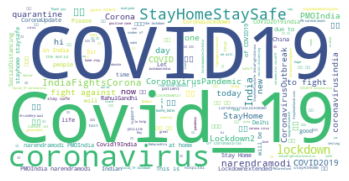

In [30]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
stopwords = set(STOPWORDS)
stopwords.update(["thi","00","ha","amp","OO","@"])


# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

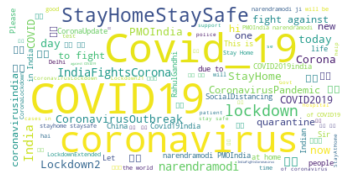

In [31]:
wordcloud = WordCloud(stopwords=stopwords,max_font_size=50, max_words=100, background_color="white").generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

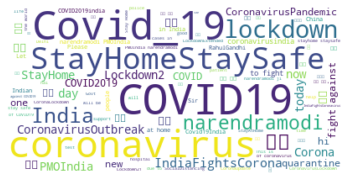

In [32]:
wordcloud = WordCloud(stopwords=stopwords,max_font_size=50, max_words=100, background_color="white").generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


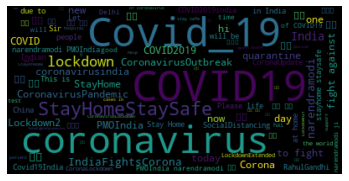

In [33]:
wordcloud = WordCloud(stopwords=stopwords,max_font_size=50, max_words=100, background_color="black").generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [34]:
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

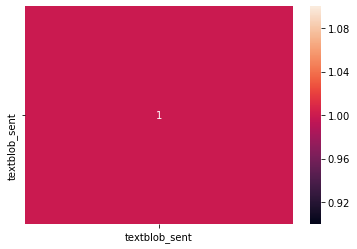

In [35]:
# Heatmap
sns.heatmap(df.corr(), annot = True)
plt.show()

In [38]:
import seaborn as sns
sns.set()

In [41]:
sns

<module 'seaborn' from '/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/__init__.py'>